<a href="https://colab.research.google.com/github/Vaishnavi741/STOCK-PREDICTION12/blob/main/Naive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
dir="/content/drive/MyDrive/Colab Notebooks/Aug31_Price_series (1).xlsx"
data=pd.read_excel(dir,index_col='time HHMMSS')

In [ ]:
data


,Spot price ltp NIFTY50,Price of Synthetic option derived future,price NIFTY23AUGFUT
time HHMMSS,,,
09:15:01,19375.55,19358.529510,19359.125
09:15:10,19361.80,19338.013578,19340.300
09:15:51,19358.50,19341.881400,19342.100
09:16:31,19374.25,19355.645595,19355.450
09:17:11,19374.25,19355.705598,19356.450
...,...,...,...
15:26:59,19262.45,19253.006319,19251.850
15:27:39,19272.85,19253.304164,19252.500
15:28:19,19283.15,19254.661953,19253.200


In [ ]:
data=data[['Spot price ltp NIFTY50']]
import matplotlib.pyplot as plt
%matplotlib inline



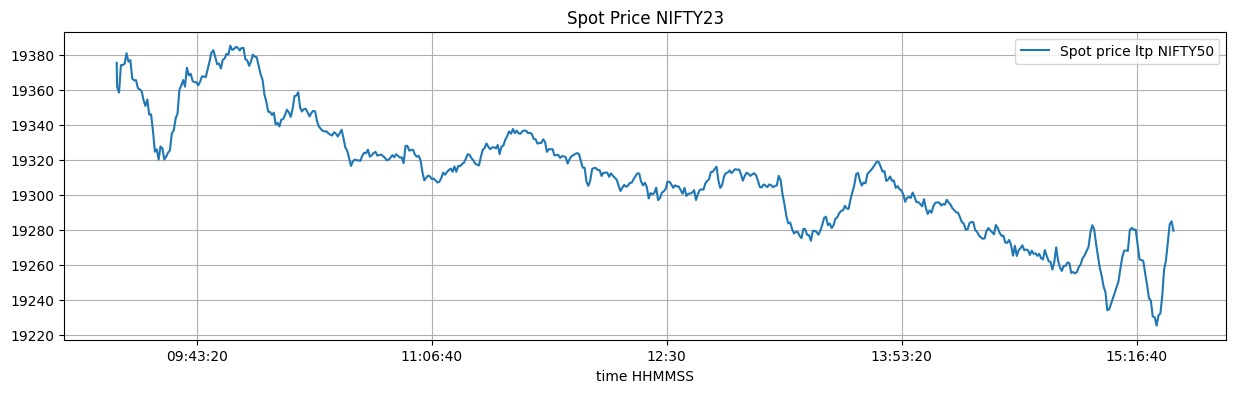

In [ ]:
data.plot(figsize=(15,4))
plt.grid()
plt.legend(loc='best')
plt.title('Spot Price NIFTY23')
plt.show(block=False)


In [ ]:
data.isnull().sum()

Spot price ltp NIFTY50    0
dtype: int64

In [ ]:
data['Predicted Spot Price']=data[['Spot price ltp NIFTY50']].shift(1)
data
data.dropna(inplace=True)


<ipython-input-8-28bb030e075a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicted Spot Price']=data[['Spot price ltp NIFTY50']].shift(1)
<ipython-input-8-28bb030e075a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
scaler=StandardScaler()
data=data[['Spot price ltp NIFTY50']]
data['Predicted Spot Price']=data[['Spot price ltp NIFTY50']].shift(1)
data.dropna(inplace=True)
X=data[['Spot price ltp NIFTY50']]
y=data[['Predicted Spot Price']]

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, shuffle=False,random_state = 0)
X_train_normalized = scaler.fit_transform(x_train)
X_test_normalized = scaler.transform(x_test)
y_train

,Predicted Spot Price
time HHMMSS,
09:15:51,19361.80
09:16:31,19358.50
09:17:11,19374.25
09:17:51,19374.25
09:18:31,19375.15
...,...
14:09:17,19294.35
14:09:57,19297.20
14:10:37,19295.65


In [ ]:

print("MSE(Testing): ",mean_squared_error(y_test, x_test))
print("MSE(Training): ",mean_squared_error(y_train, x_train))
print("RMSE(Training):",np.sqrt(mean_squared_error(y_train,x_train)))
print("RMSE(Testing):",np.sqrt(mean_squared_error(y_test,x_test)))
print("R2 Score(TR): ",r2_score(y_train,x_train))
print("R2 Score(Testing): ",r2_score(y_test, x_test))


MSE(Testing):  23.44658482142949
MSE(Training):  10.120050675675364
RMSE(Training): 3.181202708988436
RMSE(Testing): 4.842167368176103
R2 Score(TR):  0.9847265239362238
R2 Score(Testing):  0.8842830691605624


Text(0.5, 1.0, 'Actual Vs Predicted Price in Testing Data (Naive Model)')

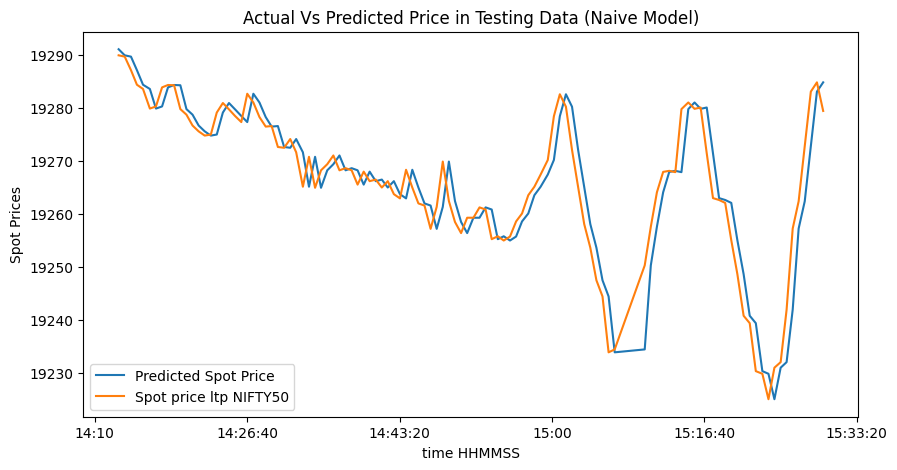

In [ ]:
y_test = y_test.squeeze()
x_test = x_test.squeeze()
dfr = pd.concat([y_test, x_test], axis=1)

dfr.loc[:,['Predicted Spot Price','Spot price ltp NIFTY50']].plot(figsize = (10,5),grid=False)
plt.ylabel("Spot Prices")
plt.title("Actual Vs Predicted Price in Testing Data (Naive Model)")